In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading the dataset
df = pd.read_csv("credit_scoring_eng.csv")
#preview 
print(df.head(10))
print("\nMissing values count: \n",df.isnull().sum())

#filling the missing values for days and income using the average
cols_to_fill = ["days_employed","total_income"]
for i in cols_to_fill:
    df[i].fillna(df[i].mean(),inplace=True)
print("\nMissing values count: \n",df.isnull().sum())



   children  days_employed  dob_years            education  education_id  \
0         1   -8437.673028         42       masters degree             0   
1         1   -4024.803754         36  secondary education             1   
2         0   -5623.422610         33  Secondary Education             1   
3         3   -4124.747207         32  secondary education             1   
4         0  340266.072047         53  secondary education             1   
5         0    -926.185831         27       masters degree             0   
6         0   -2879.202052         43       masters degree             0   
7         0    -152.779569         50  SECONDARY EDUCATION             1   
8         2   -6929.865299         35       MASTERS DEGREE             0   
9         0   -2188.756445         41  secondary education             1   

       family_status  family_status_id gender income_type  debt  \
0            married                 0      F    employee     0   
1            married         

C:\Users\CB.SC.U4CSE23169\AppData\Local\Temp\ipykernel_7016\3369773494.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(),inplace=True)


<function matplotlib.pyplot.show(close=None, block=None)>

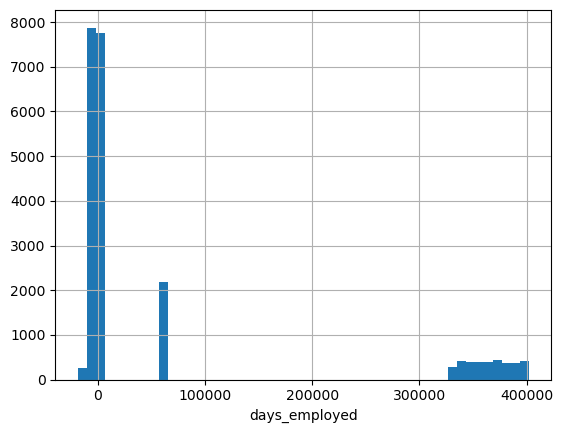

In [32]:
# visualising total_income and days_employed for possible outliers
df["days_employed"].hist(bins = 50)
plt.xlabel('days_employed')
plt.show


(1131, 12)


<function matplotlib.pyplot.show(close=None, block=None)>

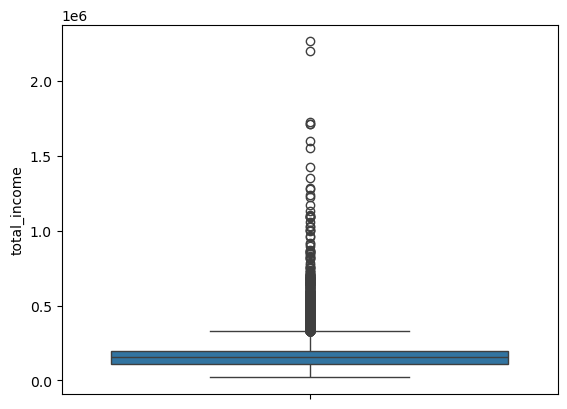

In [33]:

Q1 = df['total_income'].quantile(0.25)
Q3 = df['total_income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['total_income'] < lower_bound) | 
(df['total_income'] > upper_bound)]
print(outliers_iqr.shape)

sns.boxplot(df['total_income'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

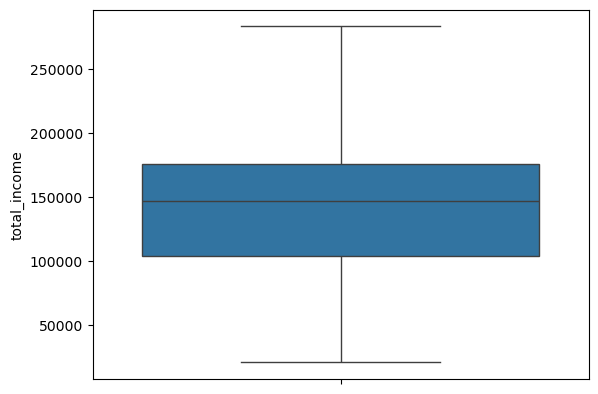

In [55]:
#since only few data pose themselves as outliers in total income - delete them
df_ = df[(df['total_income'] >= lower_bound) & (df['total_income'] <= upper_bound)]

sns.boxplot(df_['total_income'])
plt.show

(0, 12)


<function matplotlib.pyplot.show(close=None, block=None)>

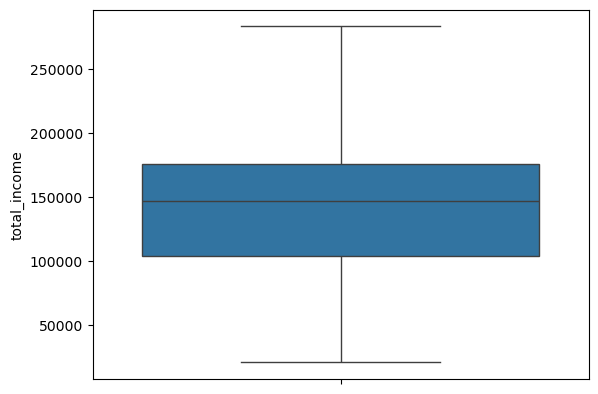

In [54]:
Q1 = df_['total_income'].quantile(0.25)
Q3 = df_['total_income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df_[(df_['total_income'] < lower_bound) | 
(df_['total_income'] > upper_bound)]
print(outliers_iqr.shape)

sns.boxplot(df_['total_income'])
plt.show

In [61]:
df_.to_csv("df")